In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
data=pd.read_csv("loan.csv")

In [14]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# BASIC INFORMATION ABOUT DATA


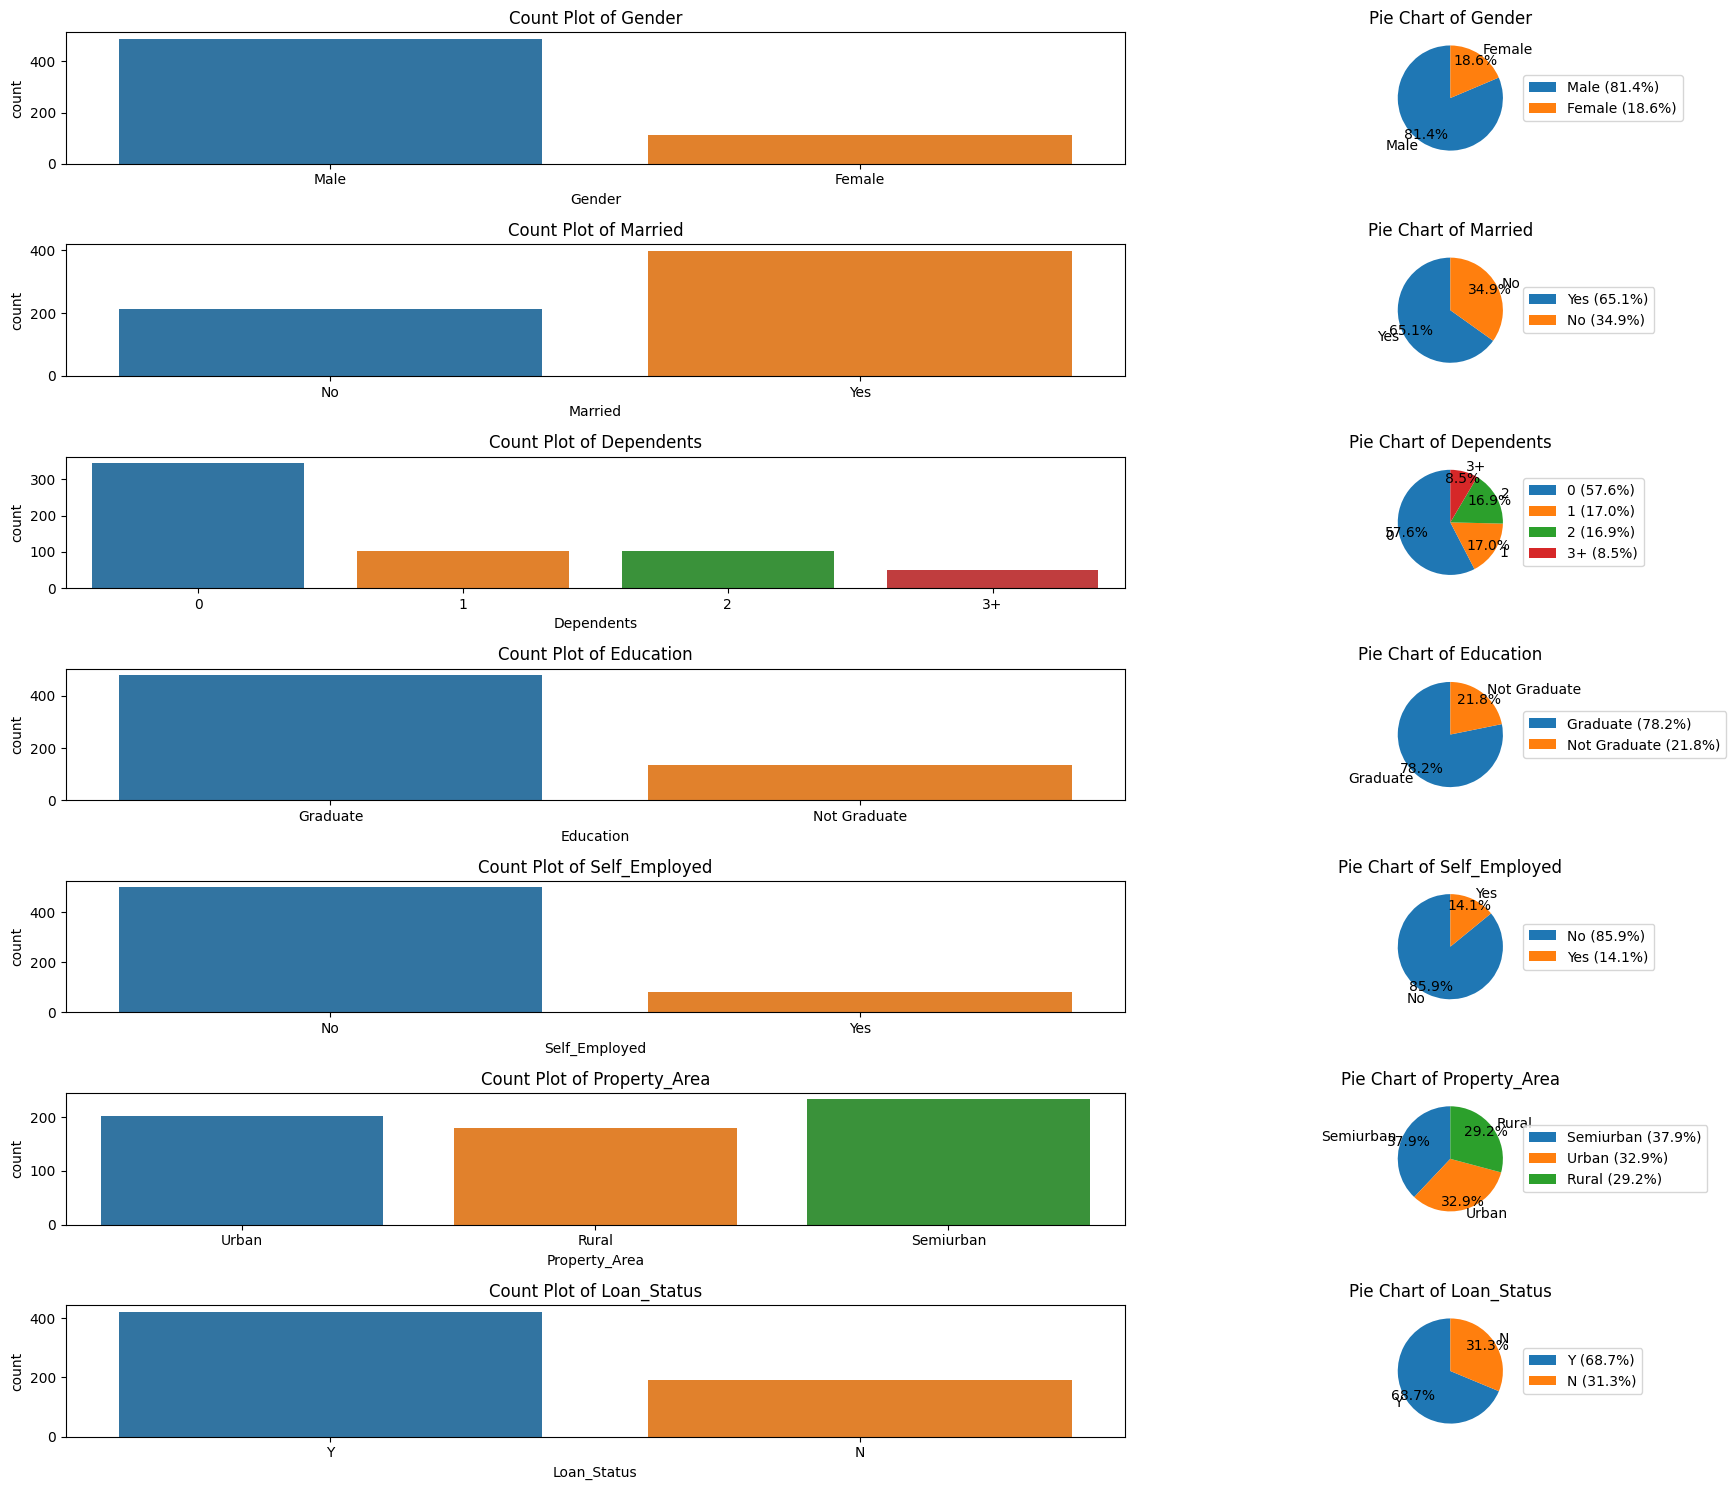

In [15]:
# Categorical columns to plot
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Set up the figure size
plt.figure(figsize=(20, 15))

# Loop through each categorical column and create plots
for i, column in enumerate(cat_columns, start=1):
    # Plot the count plot on the left side
    plt.subplot(len(cat_columns), 2, 2*i - 1)
    sns.countplot(data, x=column)
    plt.title(f'Count Plot of {column}')

    # Plot the pie chart on the right side
    plt.subplot(len(cat_columns), 2, 2*i)
    value_counts = data[column].value_counts()
    labels = [str(x) for x in value_counts.index]
    plt.pie(value_counts, labels=labels, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
    plt.title(f'Pie Chart of {column}')

    # Add percentage to legend
    percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
    plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [16]:
data.drop(columns = 'Loan_ID' , inplace = True)

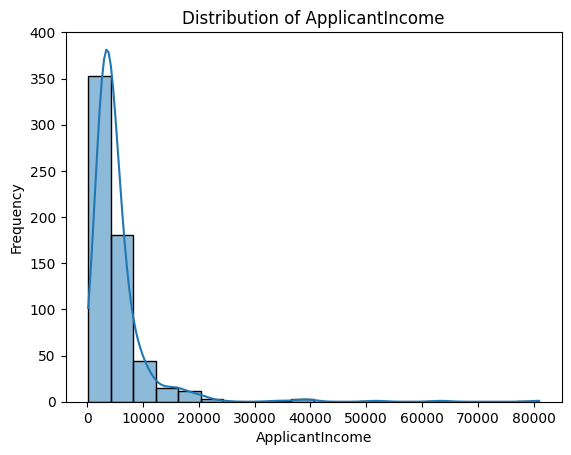

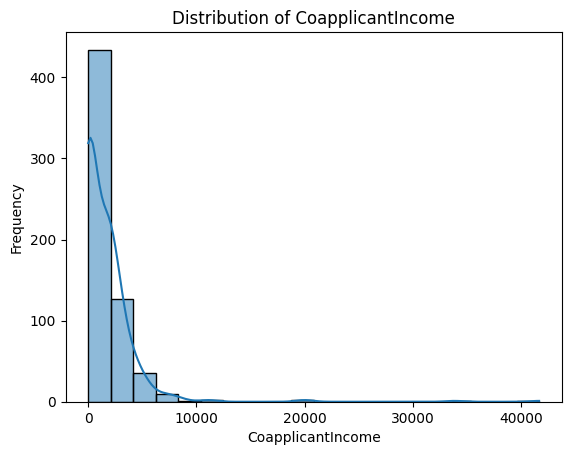

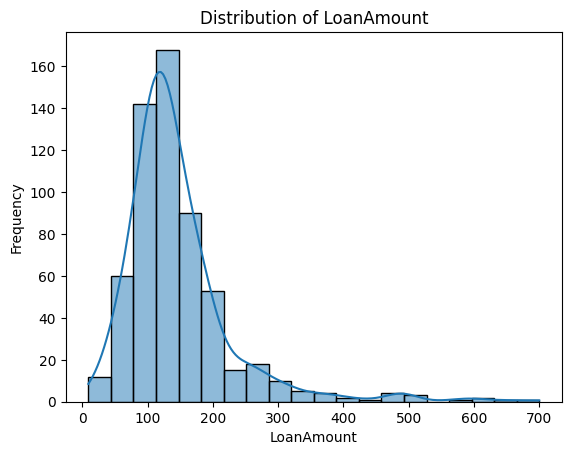

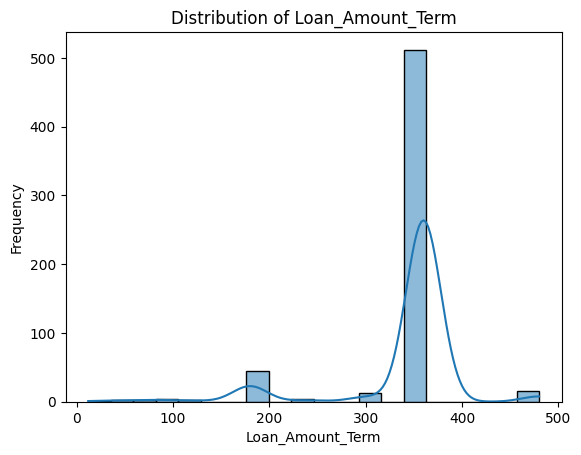

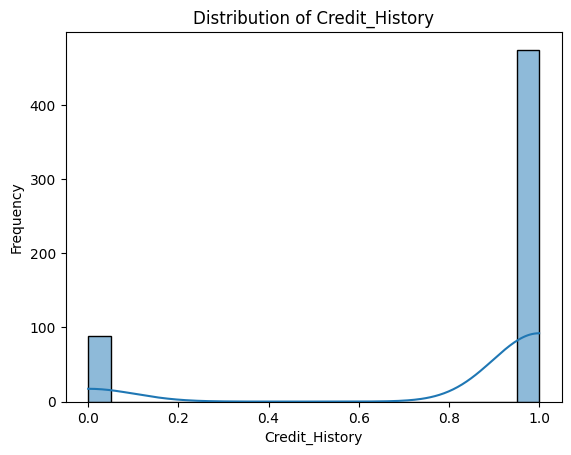

In [17]:
# List of numerical columns
numerical_columns = data.select_dtypes(include='number').columns.tolist()

# Plot histograms for numerical columns
for var in numerical_columns:
    sns.histplot(data[var], kde=True, bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


In [18]:
#data.nunique()

C:\Users\Sagar Kumar\AppData\Local\Temp\ipykernel_15816\2626855912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


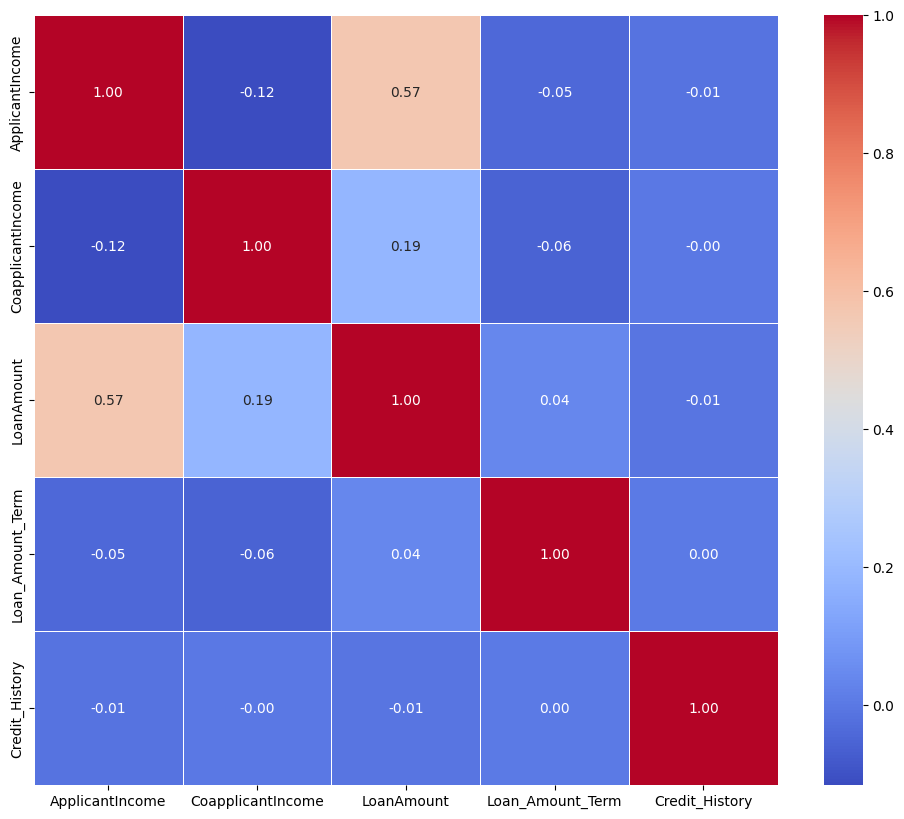

In [19]:
corr_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()


In [20]:
data.isna().sum()   

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Loan_Amount_Term mode #LoanAmount median #Credit_History Mode #dropped row 'Gender', 'Married', 'Dependents' #Self dependents KNN

In [21]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


In [22]:
data.dropna(subset=['Gender', 'Married', 'Dependents'], inplace=True)

In [23]:
data.isna().sum()   

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
columns_to_encode = ['Loan_Status','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

print(data)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_Status_Y  Gender_Male  Married_Yes  Dependents_1  \
0               1.0              1           

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data[['Self_Employed_Yes']])
data['Self_Employed_Yes'] = data_imputed
print(data)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_Status_Y  Gender_Male  Married_Yes  Dependents_1  \
0               1.0              1           

In [26]:
data.isna().sum()   

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status_Y              0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [27]:
X=data.drop('Loan_Status_Y',axis=1)
y=data['Loan_Status_Y']

In [28]:
data.duplicated().sum()

0

In [29]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Y,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,5299.614334,1638.650034,144.805461,342.081911,0.861775,0.691126,0.813993,0.648464,0.172355,0.168942,0.081911,0.220137,0.129693,0.377133,0.327645
std,5852.248540,2975.456308,81.927483,64.514228,0.345431,0.462424,0.389445,0.477858,0.378011,0.375021,0.274464,0.414693,0.336252,0.485083,0.469756
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3787.500000,1211.500000,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2324.000000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Y,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.109287,0.525792,-0.037993,-0.039539,-0.029172,0.057651,0.040201,0.048726,-0.025932,0.104654,-0.137397,0.147910,-0.003736,-0.019673
CoapplicantIncome,-0.109287,1.000000,0.207593,-0.060881,0.013233,-0.061647,0.080421,0.068690,-0.033224,0.006735,0.051460,-0.067919,-0.029266,-0.028608,0.034297
LoanAmount,0.525792,0.207593,1.000000,0.046567,-0.012247,-0.050770,0.105908,0.143387,0.068976,0.029279,0.098624,-0.169855,0.121421,0.009334,-0.050352
Loan_Amount_Term,-0.037993,-0.060881,0.046567,1.000000,0.012935,-0.009121,-0.087976,-0.105526,-0.077544,-0.011171,-0.079156,-0.080032,-0.027913,0.054399,-0.088202
Credit_History,-0.039539,0.013233,-0.012247,0.012935,1.000000,0.524170,0.011861,0.015799,-0.000514,0.022225,-0.078705,-0.061682,-0.022000,0.046394,-0.025923
Loan_Status_Y,-0.029172,-0.061647,-0.050770,-0.009121,0.524170,1.000000,0.022143,0.095707,-0.046976,0.074702,-0.042750,-0.072697,-0.016772,0.139160,-0.044825
Gender_Male,0.057651,0.080421,0.105908,-0.087976,0.011861,0.022143,1.000000,0.364502,-0.002477,0.133600,0.094808,0.042284,-0.011272,-0.116659,0.044041
Married_Yes,0.040201,0.068690,0.143387,-0.105526,0.015799,0.095707,0.364502,1.000000,0.118339,0.255657,0.141722,0.003003,-0.003014,0.005084,0.011384
Dependents_1,0.048726,-0.033224,0.068976,-0.077544,-0.000514,-0.046976,-0.002477,0.118339,1.000000,-0.205751,-0.136307,-0.013454,0.079360,0.017801,0.066498
Dependents_2,-0.025932,0.006735,0.029279,-0.011171,0.022225,0.074702,0.133600,0.255657,-0.205751,1.000000,-0.134674,0.013261,0.042842,-0.012556,0.024871


In [31]:
#data is imbalanced 405 loan passed, 181 failed

In [32]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(data)

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Standardized DataFrame:")
print(df)

Standardized DataFrame:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.093956          -0.551193   -0.205301          0.277976   
1          -0.122556          -0.043947   -0.205301          0.277976   
2          -0.393281          -0.551193   -0.962715          0.277976   
3          -0.464597           0.241968   -0.303032          0.277976   
4           0.119780          -0.551193   -0.046489          0.277976   
..               ...                ...         ...               ...   
609        -0.410383          -0.551193   -0.901633          0.277976   
610        -0.204132          -0.551193   -1.280340         -2.514490   
611         0.474135          -0.470464    1.321742          0.277976   
612         0.390506          -0.551193    0.515463          0.277976   
613        -0.122556          -0.551193   -0.144220          0.277976   

     Credit_History  Loan_Status_Y  Gender_Male  Married_Yes  Dependents_1  \
0               1.0  

# Model Selection and Evaluation


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Separate features and target variable
Xfinal = df.drop('Loan_Status_Y', axis=1)  # Features
yfinal = df['Loan_Status_Y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

if 'X_test' in globals():
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
else:
    print("Model fitted on entire data. No test set to evaluate.")


Accuracy: 0.7542372881355932
              precision    recall  f1-score   support

           0       0.94      0.35      0.51        43
           1       0.73      0.99      0.84        75

    accuracy                           0.75       118
   macro avg       0.83      0.67      0.67       118
weighted avg       0.80      0.75      0.72       118



In [34]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 4.8 MB/s eta 0:00:27
   ---------------------------------------- 0.6/124.9 MB 5.9 MB/s eta 0:00:22
   ---------------------------------------- 0.9/124.9 MB 7.3 MB/s eta 0:00:18
   ---------------------------------------- 1.1/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 1.6/124.9 MB 7.8 MB/s eta 0:00:16
    --------------------------------------- 2.1/124.9 MB 8.2 MB/s eta 0:00:15
    --------------------------------------- 2.6/124.9 MB 8.3 MB/s eta 0:00:15
    --------------------------------------- 2.8/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 3.4/124.9 MB 8.7 MB/s eta 0:00:14
   - -------------------------------------- 3.9/124.9 MB 8.9 MB/s eta 0:00:14
   - -------------------------------------- 4.4/124.9 MB 9.0 MB/s eta 0:00:14
   - -------------------------------------- 4.8/124.9 MB 9.3 MB/s eta 0


[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

if 'X_test' in globals():
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
else:
    print("Model fitted on entire data. No test set to evaluate.")


Accuracy: 0.7372881355932204
              precision    recall  f1-score   support

           0       0.80      0.37      0.51        43
           1       0.72      0.95      0.82        75

    accuracy                           0.74       118
   macro avg       0.76      0.66      0.66       118
weighted avg       0.75      0.74      0.71       118



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import delayed
from sklearn.utils.parallel import delayed



In [37]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress specific warning
warnings.filterwarnings('ignore', category=FutureWarning)


In [38]:


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 4: Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Step 5: Display results
print("\nModel Evaluation Results:")
print("-----------------------------------------------------")
for model, scores in results.items():
    print(f"{model}:")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  F1 Score: {scores['F1 Score']:.4f}")
    print("-----------------------------------------------------")



Model Evaluation Results:
-----------------------------------------------------
Decision Tree:
  Accuracy: 0.6610
  F1 Score: 0.7468
-----------------------------------------------------
Logistic Regression:
  Accuracy: 0.7542
  F1 Score: 0.8362
-----------------------------------------------------
Support Vector Machine:
  Accuracy: 0.7458
  F1 Score: 0.8315
-----------------------------------------------------
Random Forest:
  Accuracy: 0.7627
  F1 Score: 0.8409
-----------------------------------------------------
Naive Bayes:
  Accuracy: 0.7458
  F1 Score: 0.8235
-----------------------------------------------------
K-Nearest Neighbors:
  Accuracy: 0.6864
  F1 Score: 0.7978
-----------------------------------------------------


In [46]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=5, verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate best model on test data
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Accuracy: 0.7457627118644068
Random Forest - F1 Score: 0.8314606741573034


In [ ]:
# from sklearn.model_selection import GridSearchCV
# import numpy as np
# Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
# grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

# grid_search.fit(X, y)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

In [51]:
from sklearn.naive_bayes import MultinomialNB
DTree = DecisionTreeClassifier(random_state=42)
LogReg = LogisticRegression()
# SVC = SVC(random_state=42)
RForest = RandomForestClassifier(random_state=42)
Bayes = MultinomialNB()
KNN = KNeighborsClassifier()

# List of models
Models = [
    ('DecisionTree', DTree),
    ('LogisticRegression', LogReg),
    ('SVC', SVC_model),
    ('RandomForest', RForest),
    ('MultinomialNB', Bayes),
    ('KNeighbors', KNN)
]

# Lists to store results
model_names = []
accuracies = []
f1_scores = []

# Example code to fit and predict using the models
for name, model in Models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)
    print(f"Model: {name}, Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Plotting using seaborn for grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
bar_width = 0.35
index = np.arange(len(model_names))

bar1 = plt.bar(index, accuracies, bar_width, label='Accuracy', color='b', alpha=0.7)
bar2 = plt.bar(index + bar_width, f1_scores, bar_width, label='F1-score', color='g', alpha=0.7)

plt.title('Accuracy and F1-score Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to range 0-1 (assuming scores are in this range)
plt.legend()
plt.tight_layout()
plt.show()


Model: DecisionTree, Accuracy: 0.6610, F1-score: 0.6522
Model: LogisticRegression, Accuracy: 0.7542, F1-score: 0.7167
Model: SVC, Accuracy: 0.7458, F1-score: 0.7044
Model: RandomForest, Accuracy: 0.7627, F1-score: 0.7288
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Sagar Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Sagar Kumar\AppData\Local\Temp\ipykernel_15816\229368960.py", line 26, in <module>
    model.fit(X_train, y_train)
  File "C:\Users\Sagar Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    names out, such as :class:`~sklearn.decomposition.PCA`. For example, if
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sagar Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 772, in fit
  File "C:\Users\Sagar Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 894, in _count
    def _joint_log_likelihood(self, X):
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sagar Kuma

Model: DecisionTree, Accuracy: 0.6610, F1-score: 0.6522
Model: LogisticRegression, Accuracy: 0.7542, F1-score: 0.7167
Model: SVC, Accuracy: 0.7458, F1-score: 0.7044
Model: RandomForest, Accuracy: 0.7627, F1-score: 0.7288
Model: KNeighbors, Accuracy: 0.6864, F1-score: 0.6171


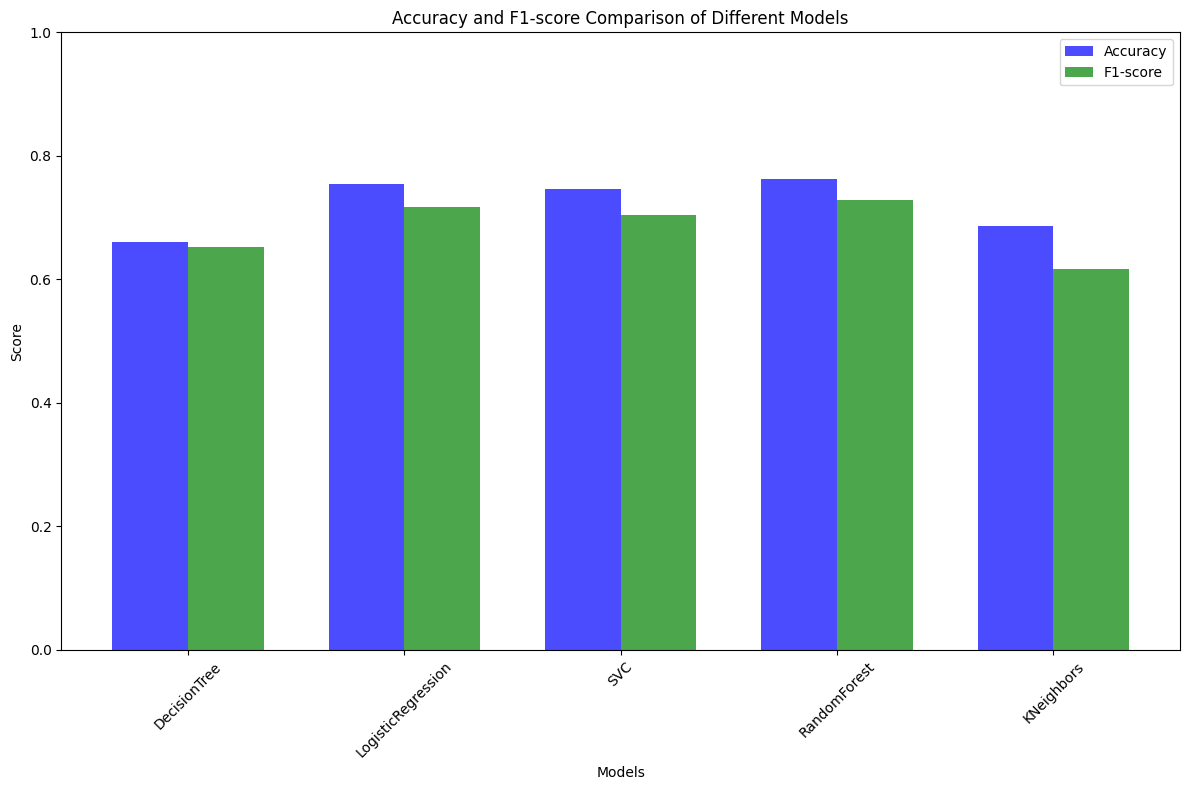

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Ensure SVC is imported correctly
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define classifiers
DTree = DecisionTreeClassifier(random_state=42)
LogReg = LogisticRegression()
SVC_model = SVC(random_state=42)  # Rename SVC to SVC_model to avoid conflict
RForest = RandomForestClassifier(random_state=42)
Bayes = MultinomialNB()
KNN = KNeighborsClassifier()

# List of models
Models = [
    ('DecisionTree', DTree),
    ('LogisticRegression', LogReg),
    ('SVC', SVC_model),  # Use SVC_model instead of SVC
    ('RandomForest', RForest),
    ('KNeighbors', KNN)
]

# Lists to store results
model_names = []
accuracies = []
f1_scores = []

# Example code to fit and predict using the models
for name, model in Models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)
    print(f"Model: {name}, Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Plotting using seaborn for grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
bar_width = 0.35
index = np.arange(len(model_names))

bar1 = plt.bar(index, accuracies, bar_width, label='Accuracy', color='b', alpha=0.7)
bar2 = plt.bar(index + bar_width, f1_scores, bar_width, label='F1-score', color='g', alpha=0.7)

plt.title('Accuracy and F1-score Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to range 0-1 (assuming scores are in this range)
plt.legend()
plt.tight_layout()
plt.show()
